In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
print("Missing values:\n", df.isna().sum())

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


***Basic-Level Questions***

**Q1 What is the average age of patients in the dataset?**

In [6]:
avg_age = df['age'].mean()
print("Average Age of Patients:", round(avg_age, 2))

Average Age of Patients: 54.43


**Q2 What is the gender distribution of patients?**

In [7]:
gender_dist = df['sex'].value_counts()
print("\nGender Distribution:\n", gender_dist)


Gender Distribution:
 sex
1    713
0    312
Name: count, dtype: int64


**Q3 What is the average resting blood pressure of patients?**

In [8]:
avg_bp = df['trestbps'].mean()
print("\nAverage Resting Blood Pressure:", round(avg_bp, 2))


Average Resting Blood Pressure: 131.61


**Q4 How many patients have fasting blood sugar levels higher than 120 mg/dl?**

In [9]:
high_fbs_count = df['fbs'].sum()
print("\nPatients with Fasting Blood Sugar > 120 mg/dl:", high_fbs_count)


Patients with Fasting Blood Sugar > 120 mg/dl: 153


**Q5 What are the different types of chest pain recorded in the dataset?**

In [10]:
chest_pain_types = df['cp'].unique()
print("\nChest Pain Types:", chest_pain_types)


Chest Pain Types: [0 1 2 3]


**Q6 What is the maximum heart rate achieved by patients?**

In [11]:
max_heart_rate = df['thalach'].max()
print("\nMaximum Heart Rate Achieved:", max_heart_rate)


Maximum Heart Rate Achieved: 202


**Q7 What percentage of patients experience exercise-induced angina?**

In [12]:
exang_percent = df['exang'].mean() * 100
print("\nPercentage with Exercise-Induced Angina:", round(exang_percent, 2), "%")


Percentage with Exercise-Induced Angina: 33.66 %


**Q8 What is the average cholesterol level in the dataset?**

In [13]:
avg_chol = df['chol'].mean()
print("\nAverage Cholesterol Level:", round(avg_chol, 2))


Average Cholesterol Level: 246.0


**Q9 How many patients have a resting electrocardiographic result of 2?**

In [14]:
restecg_2_count = df['restecg'].value_counts().get(2, 0)
print("\nPatients with Resting ECG Result = 2:", restecg_2_count)


Patients with Resting ECG Result = 2: 15


**Q10 What is the distribution of the number of major vessels colored by fluoroscopy?**

In [15]:
ca_dist = df['ca'].value_counts()
print("\nDistribution of Major Vessels (ca):\n", ca_dist)


Distribution of Major Vessels (ca):
 ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64


***Medium-Level Questions***

**Q1 What is the correlation between age and cholesterol levels?**

In [16]:
print("\nCorrelation between Age and Cholesterol:")
print(df[['age', 'chol']].corr())


Correlation between Age and Cholesterol:
           age      chol
age   1.000000  0.219823
chol  0.219823  1.000000


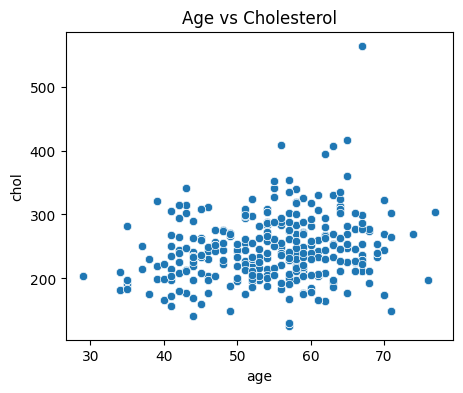

In [17]:
plt.figure(figsize=(5,4))
sns.scatterplot(x='age', y='chol', data=df)
plt.title("Age vs Cholesterol")
plt.show()

**Q2 What is the distribution of chest pain types across different age groups?**

<Figure size 1200x600 with 0 Axes>

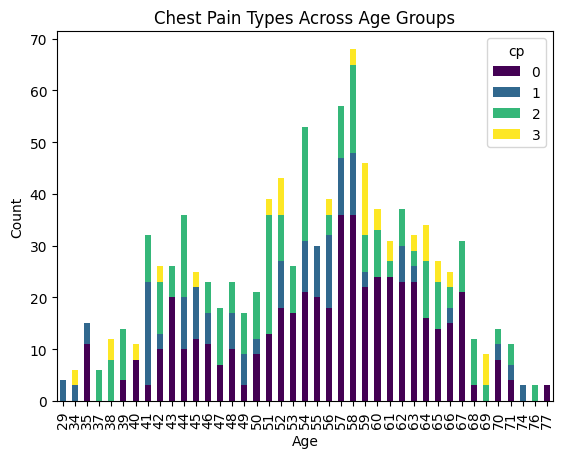

In [18]:
plt.figure(figsize=(12,6))
df.groupby('age')['cp'].value_counts().unstack().plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Chest Pain Types Across Age Groups")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

**Q3 How does maximum heart rate vary with exercise-induced angina?**

In [19]:
print("\nAverage Max Heart Rate by Exercise-Induced Angina (exang):")
print(df.groupby('exang')['thalach'].mean())


Average Max Heart Rate by Exercise-Induced Angina (exang):
exang
0    155.342647
1    136.837681
Name: thalach, dtype: float64


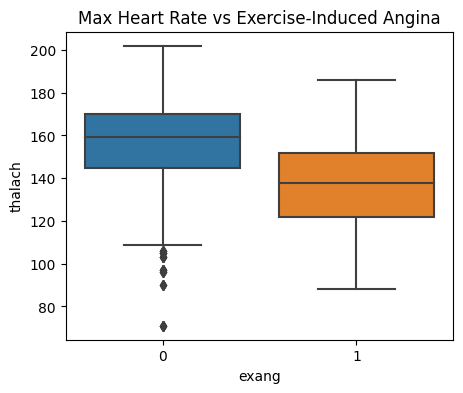

In [20]:
plt.figure(figsize=(5,4))
sns.boxplot(x='exang', y='thalach', data=df)
plt.title("Max Heart Rate vs Exercise-Induced Angina")
plt.show()

**Q4 Is there a significant difference in resting blood pressure between male and female patients?**

In [21]:
male_bp = df[df['sex']==1]['trestbps']
female_bp = df[df['sex']==0]['trestbps']

print("\nAverage BP by Gender:")  # Mean comparison
print(df.groupby('sex')['trestbps'].mean())

from scipy.stats import ttest_ind
stat, p_value = ttest_ind(male_bp, female_bp)
print("\nT-test Results for BP difference between genders:")
print("T-statistic:", stat, "P-value:", p_value)


Average BP by Gender:
sex
0    133.701923
1    130.697055
Name: trestbps, dtype: float64

T-test Results for BP difference between genders:
T-statistic: -2.533840303766843 P-value: 0.011430321504680553


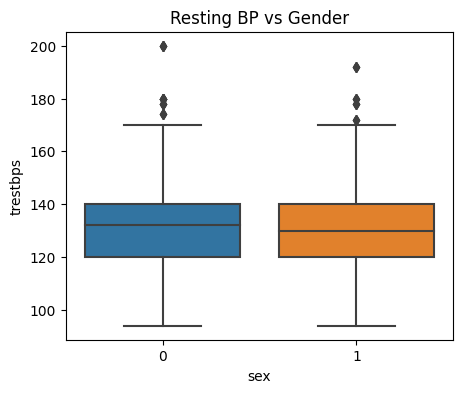

In [22]:
plt.figure(figsize=(5,4))
sns.boxplot(x='sex', y='trestbps', data=df)
plt.title("Resting BP vs Gender")
plt.show()

**Q5 What is the relationship between fasting blood sugar levels and the presence of heart disease?**

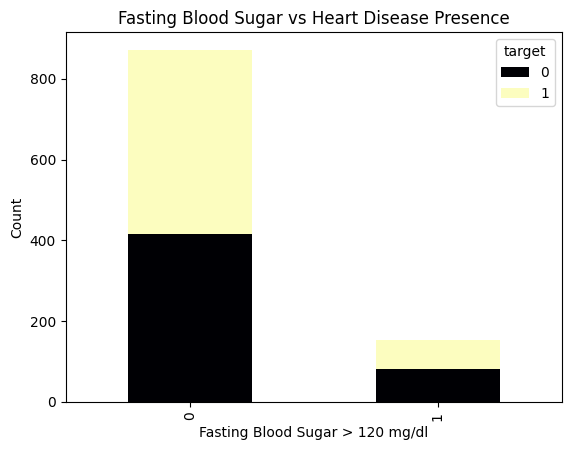

In [23]:
pd.crosstab(df['fbs'], df['target']).plot(kind='bar', stacked=True, colormap="magma")
plt.title("Fasting Blood Sugar vs Heart Disease Presence")
plt.xlabel("Fasting Blood Sugar > 120 mg/dl")
plt.ylabel("Count")
plt.show()

**Q6 How does the number of major vessels (ca) affect the target variable (heart disease presence)?**

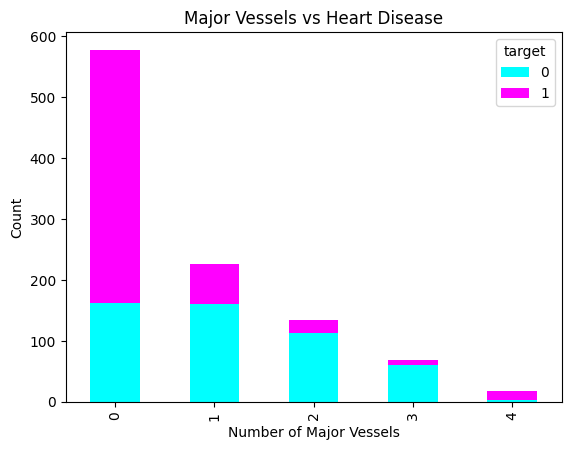

In [24]:
pd.crosstab(df['ca'], df['target']).plot(kind='bar', stacked=True, colormap='cool')
plt.title("Major Vessels vs Heart Disease")
plt.xlabel("Number of Major Vessels")
plt.ylabel("Count")
plt.show()

**Q7 What is the average oldpeak value for patients with different types of chest pain?**

In [25]:
print("\nAverage Oldpeak by Chest Pain Type:")
print(df.groupby('cp')['oldpeak'].mean())


Average Oldpeak by Chest Pain Type:
cp
0    1.438833
1    0.323952
2    0.784507
3    1.380519
Name: oldpeak, dtype: float64


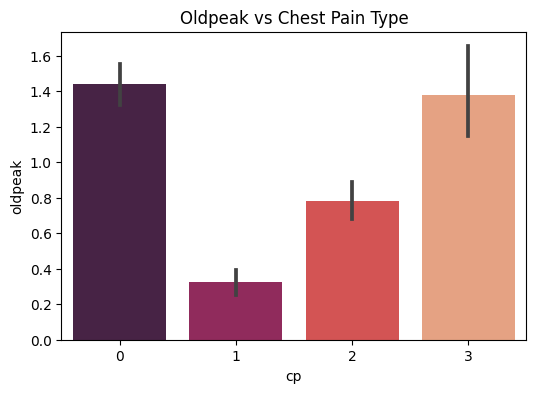

In [26]:
plt.figure(figsize=(6,4))
sns.barplot(x='cp', y='oldpeak', data=df, palette="rocket")
plt.title("Oldpeak vs Chest Pain Type")
plt.show()

**Q8 Analyze the distribution of thalassemia types (thal) among patients with heart disease.**

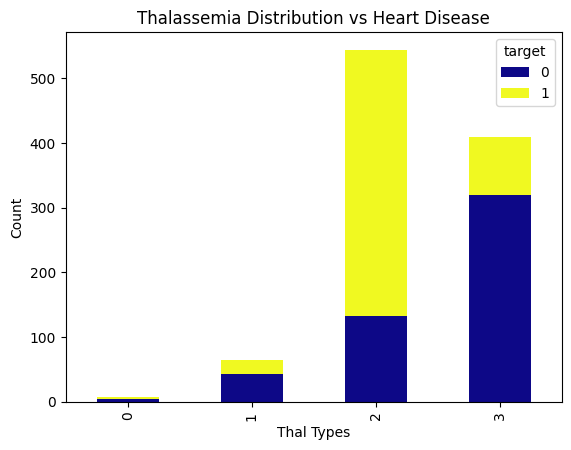

In [27]:
pd.crosstab(df['thal'], df['target']).plot(kind='bar', stacked=True, colormap="plasma")
plt.title("Thalassemia Distribution vs Heart Disease")
plt.xlabel("Thal Types")
plt.ylabel("Count")
plt.show()

**Q9 What are the most common combinations of risk factors in patients with heart disease?**

In [28]:
risk_factors = df[df['target'] == 1].groupby(['cp', 'fbs', 'exang', 'thal']).size().reset_index(name='counts')
common_combinations = risk_factors.sort_values(by='counts', ascending=False)

print("\nMost Common Risk Factor Combinations for Heart Disease:")
print(common_combinations.head(10))


Most Common Risk Factor Combinations for Heart Disease:
    cp  fbs  exang  thal  counts
15   2    0      0     2     133
8    1    0      0     2      97
1    0    0      0     2      73
19   2    1      0     2      32
16   2    0      0     3      19
4    0    0      1     2      18
23   3    0      0     2      16
9    1    0      0     3      15
17   2    0      1     2      13
24   3    0      0     3      10


**Q10 Perform a pairwise comparison of clinical measurements for patients with and without heart disease.**

In [29]:
print("\nSummary Stats for Patients WITH Heart Disease:")
print(df[df['target'] == 1].describe())

print("\nSummary Stats for Patients WITHOUT Heart Disease:")
print(df[df['target'] == 0].describe())


Summary Stats for Patients WITH Heart Disease:
              age         sex          cp    trestbps        chol         fbs  \
count  526.000000  526.000000  526.000000  526.000000  526.000000  526.000000   
mean    52.408745    0.570342    1.378327  129.245247  240.979087    0.134981   
std      9.631804    0.495498    0.945881   16.112188   53.010345    0.342029   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     44.000000    0.000000    1.000000  120.000000  208.000000    0.000000   
50%     52.000000    1.000000    2.000000  130.000000  234.000000    0.000000   
75%     59.000000    1.000000    2.000000  140.000000  265.750000    0.000000   
max     76.000000    1.000000    3.000000  180.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  526.000000  526.000000  526.000000  526.000000  526.000000  526.000000   
mean     0.598859  158.585551    0.134981    0.569962    1.5

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

<Figure size 1000x800 with 0 Axes>

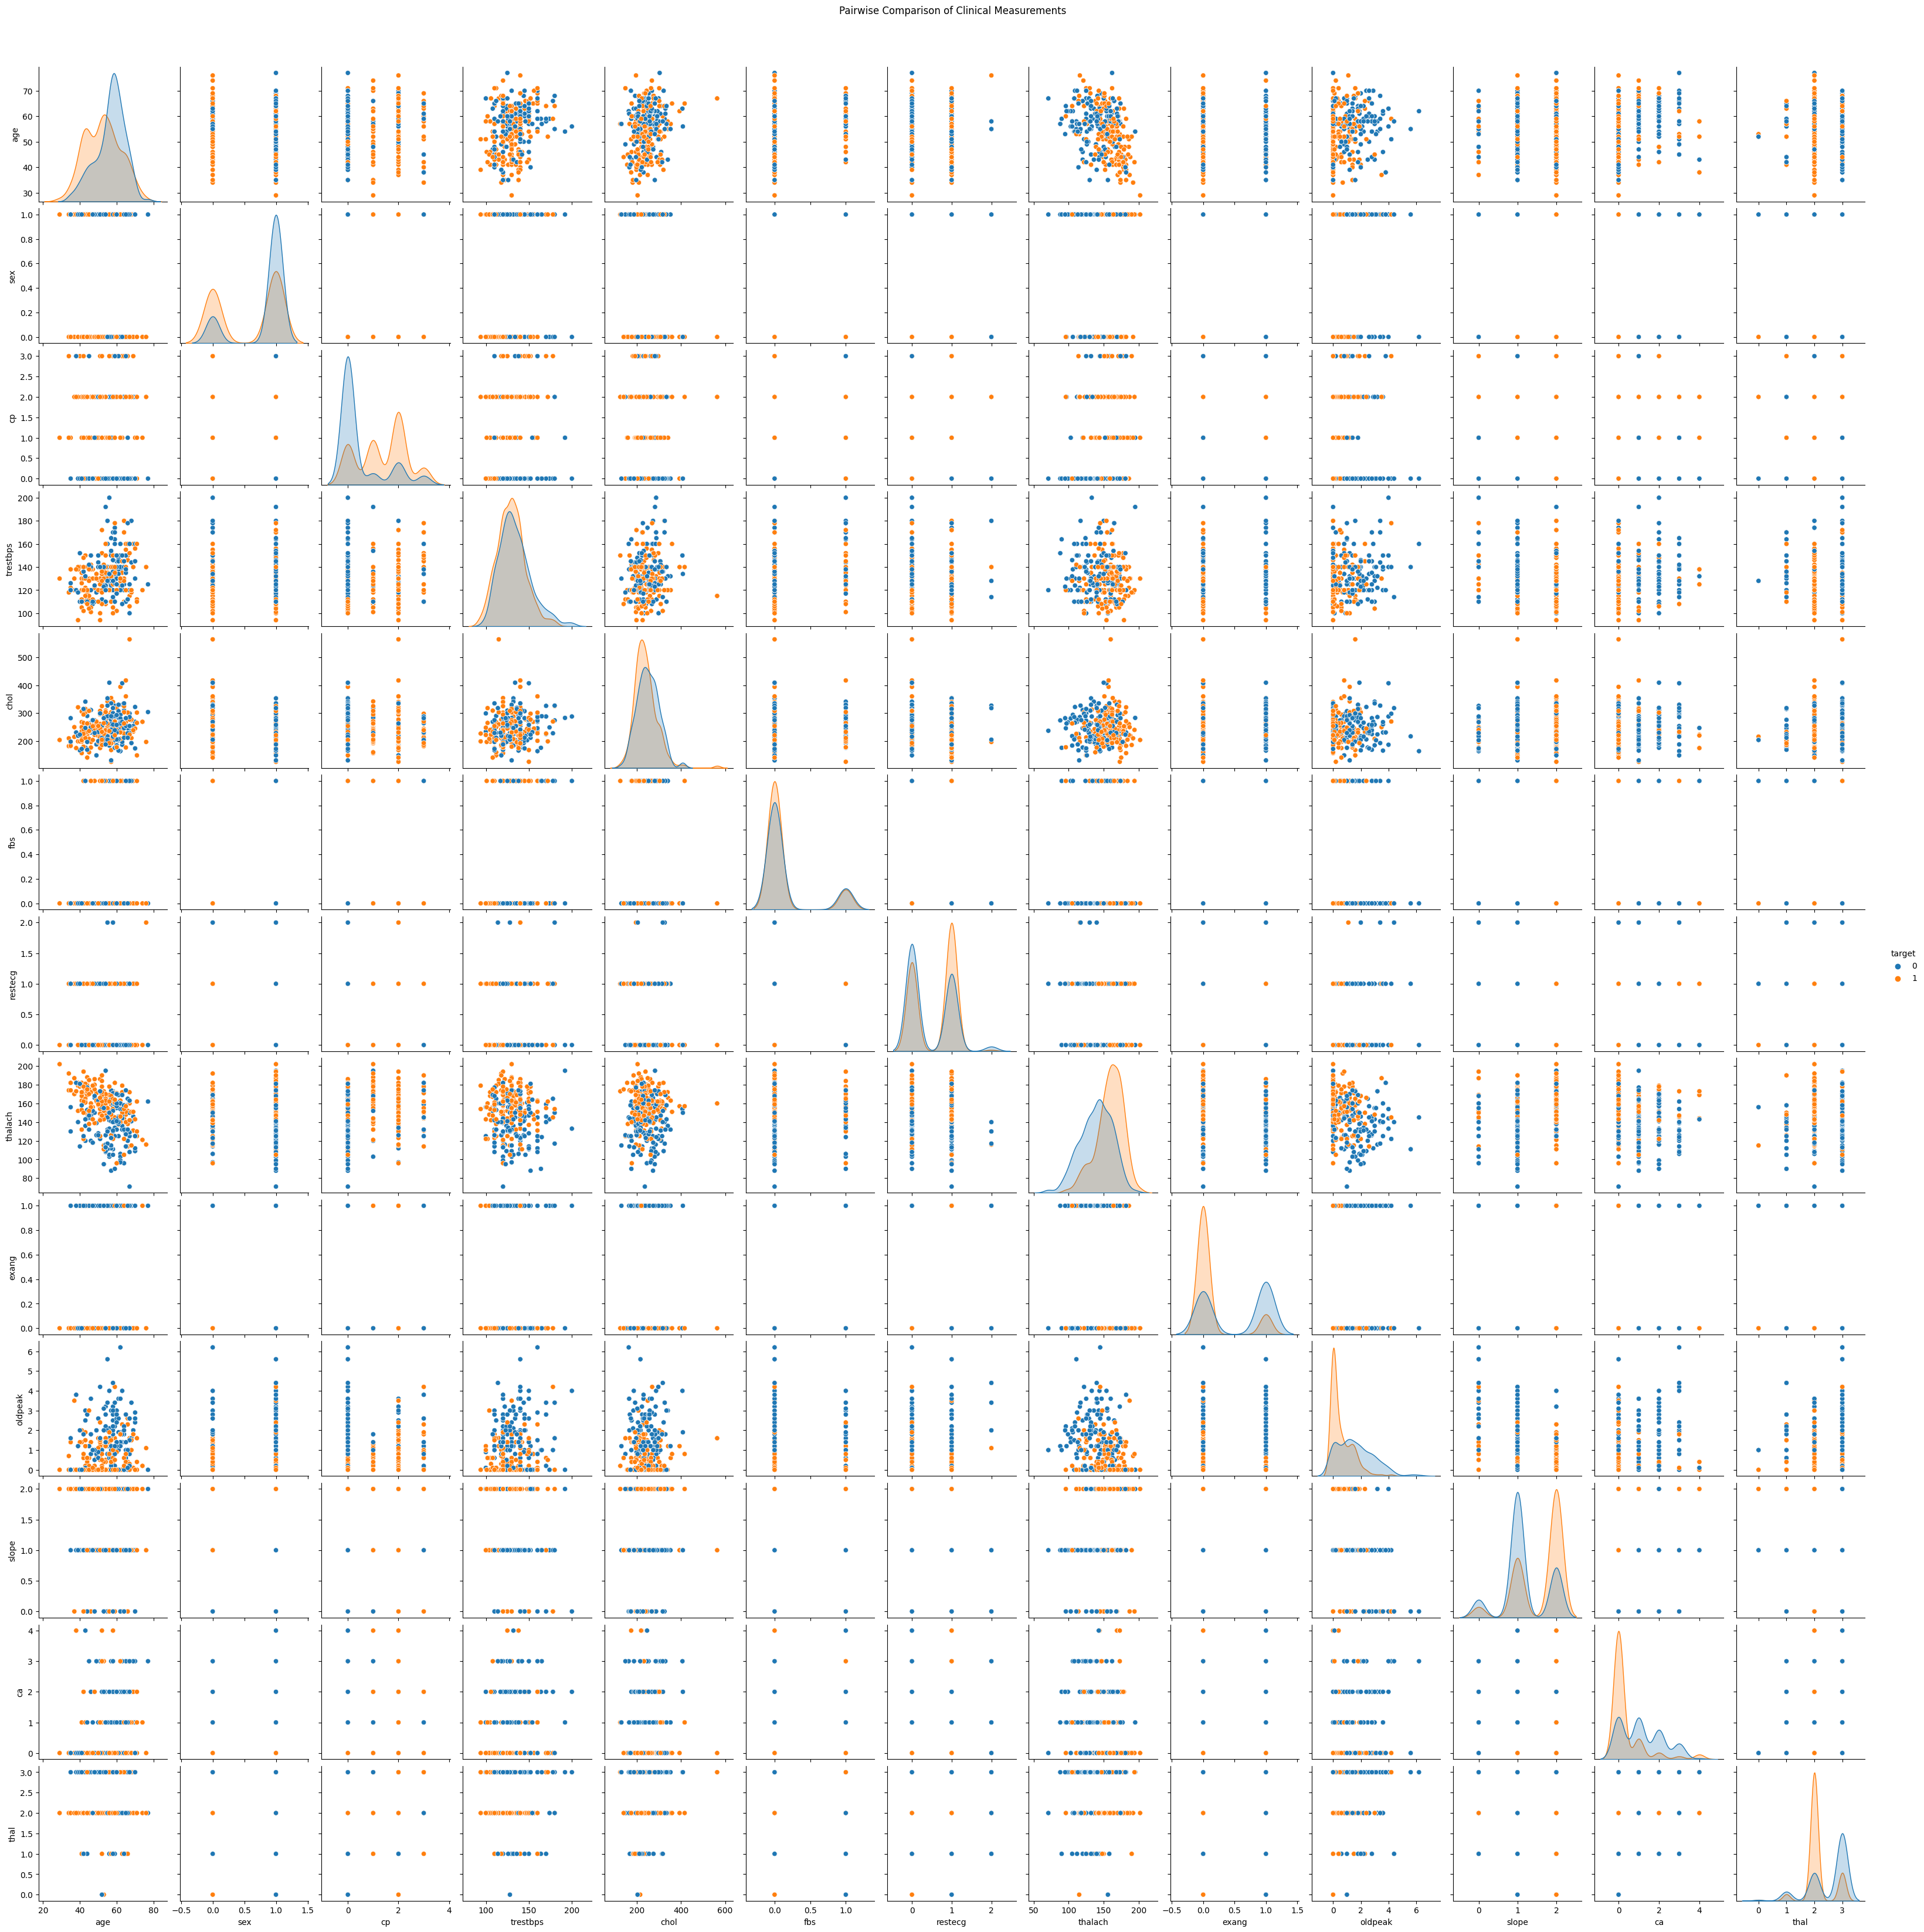

In [30]:
plt.figure(figsize=(10,8))
sns.pairplot(df, hue='target')
plt.suptitle("Pairwise Comparison of Clinical Measurements", y=1.02)
plt.show()

***Advanced-Level Questions***

**Q1 What is the effect of combining multiple risk factors (age, cholesterol, blood pressure) on the likelihood of heart disease?**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

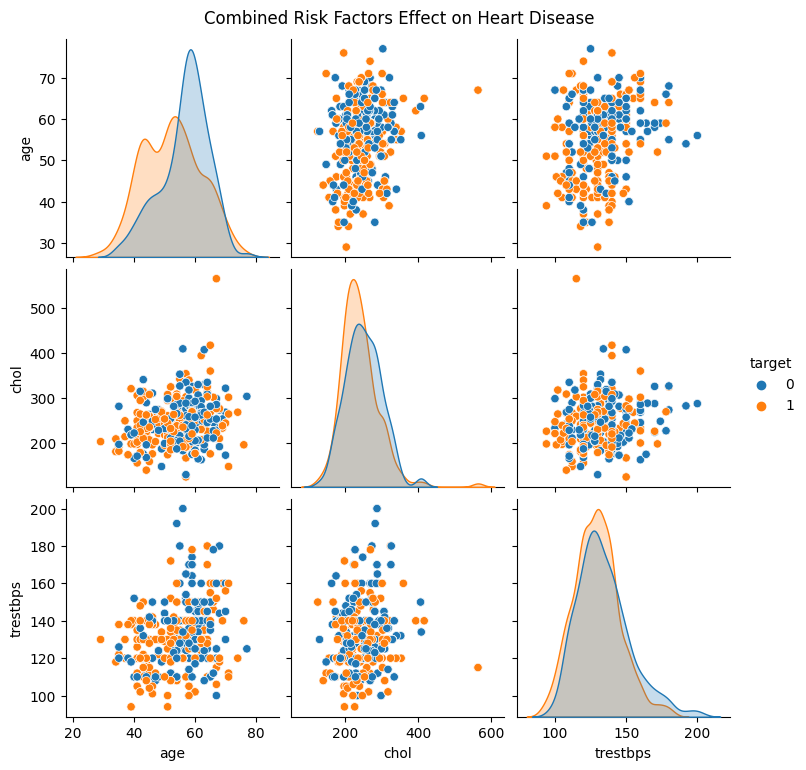

In [31]:
sns.pairplot(df, hue='target', vars=['age', 'chol', 'trestbps'])
plt.suptitle("Combined Risk Factors Effect on Heart Disease", y=1.02)
plt.show()

**Q2 Which clinical measurement has the strongest correlation with heart disease presence?**

In [32]:
print("\nCorrelation of Features with Heart Disease:\n")
corr_target = df.corr()['target'].sort_values(ascending=False)
print(corr_target)


Correlation of Features with Heart Disease:

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


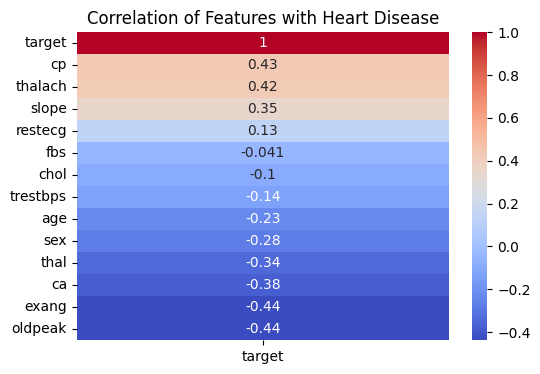

In [33]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr()[['target']].sort_values(by='target', ascending=False), annot=True, cmap="coolwarm")
plt.title("Correlation of Features with Heart Disease")
plt.show()

**Q3 Perform a logistic regression analysis to predict the presence of heart disease using all available features.
Hint: Use LogisticR**

In [34]:
# Feature selection (all columns except 'target')
X = df.drop('target', axis=1)
y = df['target']

# Scale values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Model
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

# Predictions
y_pred = log_model.predict(X_test)

print("\n📌 Logistic Regression Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
coef_df = pd.DataFrame({
    "Feature": df.columns[:-1],
    "Importance": abs(log_model.coef_[0])
}).sort_values(by="Importance", ascending=False)

print("\n🔎 Logistic Regression Feature Importance:\n")
print(coef_df)


📌 Logistic Regression Model Performance:
Accuracy: 0.7898832684824902

Confusion Matrix:
 [[ 96  36]
 [ 18 107]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.73      0.78       132
           1       0.75      0.86      0.80       125

    accuracy                           0.79       257
   macro avg       0.80      0.79      0.79       257
weighted avg       0.80      0.79      0.79       257


🔎 Logistic Regression Feature Importance:

     Feature  Importance
1        sex    0.897748
2         cp    0.868102
9    oldpeak    0.828884
11        ca    0.807555
12      thal    0.650163
7    thalach    0.639886
4       chol    0.599249
8      exang    0.382348
10     slope    0.351215
3   trestbps    0.291563
6    restecg    0.090565
5        fbs    0.062616
0        age    0.028220


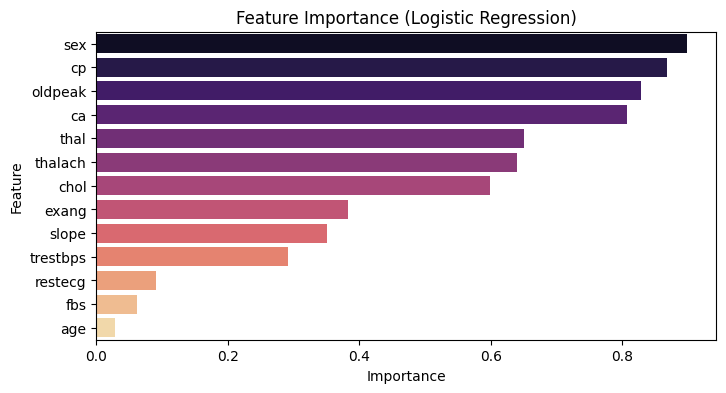

In [35]:
plt.figure(figsize=(8,4))
sns.barplot(x="Importance", y="Feature", data=coef_df, palette="magma")
plt.title("Feature Importance (Logistic Regression)")
plt.show()

**Q4 How do the values of the slope of the peak exercise ST segment (slope) vary with different chest pain types?**

<Figure size 800x500 with 0 Axes>

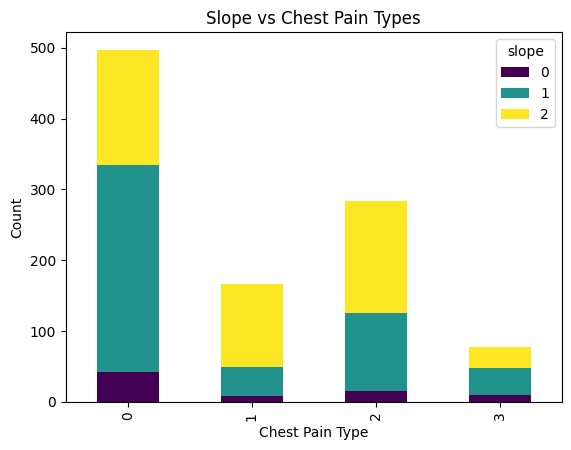

In [36]:
plt.figure(figsize=(8,5))
df.groupby('cp')['slope'].value_counts().unstack().plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Slope vs Chest Pain Types")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()

**Q5 Analyze the survival rates of patients with different thalassemia types over a period.**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

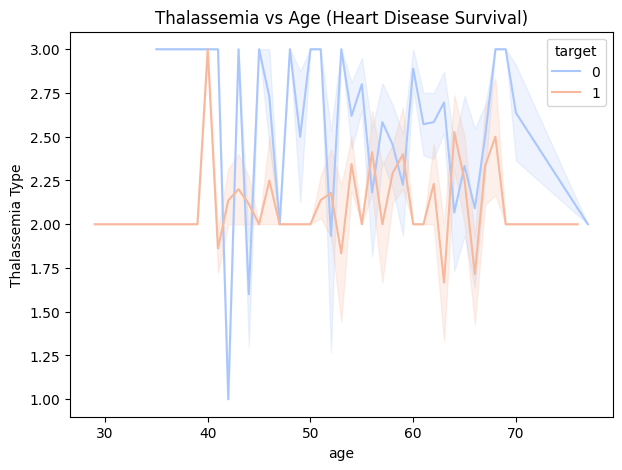

In [37]:
plt.figure(figsize=(7,5))
sns.lineplot(x='age', y='thal', hue='target', data=df, palette="coolwarm")
plt.title("Thalassemia vs Age (Heart Disease Survival)")
plt.ylabel("Thalassemia Type")
plt.show()

***Conclusion***

This project successfully analyzed heart disease data, identified key risk factors such as age, blood pressure, cholesterol, and diabetes, and built a logistic regression model for early prediction. The insights can support timely medical decisions, help reduce heart disease risk, and improve patient care through data-driven healthcare.

Promote regular health screenings. Encourage lifestyle changes like exercise and healthy diet. Use predictive tools in hospitals for early diagnosis.

Implement advanced machine learning models. Use real-time health data from wearable devices. Develop a hospital-based predictive application.